# Import Libraries 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk 
import re
import string

# 1. Loading Data

## 1.A Reading data from files

In [2]:
train_data = pd.read_csv("Corona_NLP_train.csv", encoding="latin1")
test_data = pd.read_csv("Corona_NLP_test.csv", encoding="latin1")

## 1.B First insight on data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [5]:
print("Training Data: ", train_data.shape)
train_data.head()

Training Data:  (41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
print("Testing Data: ", test_data.shape)
test_data.head()

Testing Data:  (3798, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# 2. Exploratory Data Analysis

## Plotting Frequency for Labels present in the data 

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

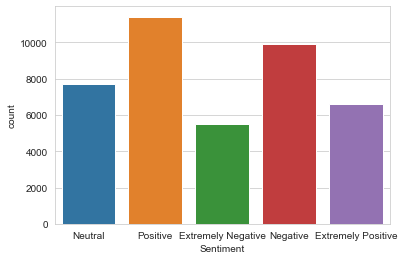

In [7]:
#Traning data
sns.set_style('whitegrid')
sns.countplot(x='Sentiment',data=train_data)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

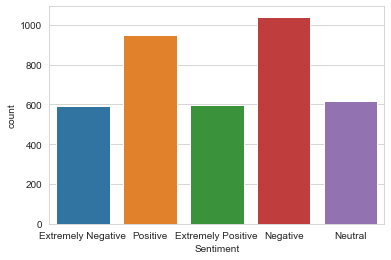

In [8]:
#Testing data
sns.set_style('whitegrid')
sns.countplot(x='Sentiment',data=test_data)

# 3. Data Preprocessing

## 3.A Checking out the raw tweets

In [9]:
train_tweets = train_data['OriginalTweet']
test_tweets = test_data['OriginalTweet']

In [10]:
train_tweets.head()

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
Name: OriginalTweet, dtype: object

In [11]:
test_tweets.head()

0    TRENDING: New Yorkers encounter empty supermar...
1    When I couldn't find hand sanitizer at Fred Me...
2    Find out how you can protect yourself and love...
3    #Panic buying hits #NewYork City as anxious sh...
4    #toiletpaper #dunnypaper #coronavirus #coronav...
Name: OriginalTweet, dtype: object

## 3.B Cleaned/Processed Tweets

In [12]:
# Function to preprocess the tweets
def data_cleaning(tweet):
    url_reg = re.compile(r"""(?i)((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info
                      |int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|
                      bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|
                      cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|
                      gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|
                      la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|
                      nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|
                      sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|
                      uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]
                      *?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’])|(?:(?<!@)
                      [a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name
                      |post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn
                      |bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg
                      |eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id
                      |ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|
                      md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|
                      ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|
                      sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|
                      za|zm|zw)\b/?(?!@)))""")
    removal_reg = re.compile(r'(<.:*?>)|(\d+)|(#\w+)|(@\w+)')
    reserved_words_reg =  re.compile(r'\b(?<![@#])(RT|FAV)\b')
    spchars_reg = re.compile(r'[^a-zA-z0-9.,!?/:;\"\'\s]')

    tweet = url_reg.sub('',tweet)
    tweet = removal_reg.sub('',tweet)
    tweet = reserved_words_reg.sub('',tweet)
    tweet = spchars_reg.sub('',tweet)

    tweet = tweet.lower()

    return tweet

In [13]:
cleaned_train = train_tweets.apply(data_cleaning)
cleaned_test = test_tweets.apply(data_cleaning)

In [14]:
cleaned_train.head()

0                                            and  and 
1    advice talk to your neighbours family to excha...
2    coronavirus australia: woolworths to give elde...
3    my food stock is not the only one which is emp...
4    me, ready to go at supermarket during the  out...
Name: OriginalTweet, dtype: object

In [15]:
cleaned_test.head()

0    trending: new yorkers encounter empty supermar...
1    when i couldn't find hand sanitizer at fred me...
2    find out how you can protect yourself and love...
3     buying hits  city as anxious shoppers stock u...
4                   one week everyone buying baby m...
Name: OriginalTweet, dtype: object

## 3.C Tokenization

In [16]:
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def frequency_plotter(frequency):
    _, top_values = zip(*frequency.most_common(500))
    plt.figure(figsize=(12,6))
    plt.plot(top_values)
    plt.ylabel("Counts")
    plt.xlabel("Ranks")
    plt.xticks(np.arange(0, len(top_values)+1, 10),  rotation='vertical')
    plt.title("Frequency")
    plt.show()

In [18]:
tokenizer = TweetTokenizer()

def data_tokenizer(data, tokenizer=tokenizer):
    return tokenizer.tokenize(data)

In [19]:
final_train = cleaned_train.apply(data_tokenizer)
final_test = cleaned_test.apply(data_tokenizer)

In [20]:
final_train.head()

0                                           [and, and]
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, :, woolworths, to, gi...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, ,, ready, to, go, at, supermarket, during...
Name: OriginalTweet, dtype: object

Total Number of words in training data after raw tokenization:  1225043
Unique words in training data after raw tokenization:  35383


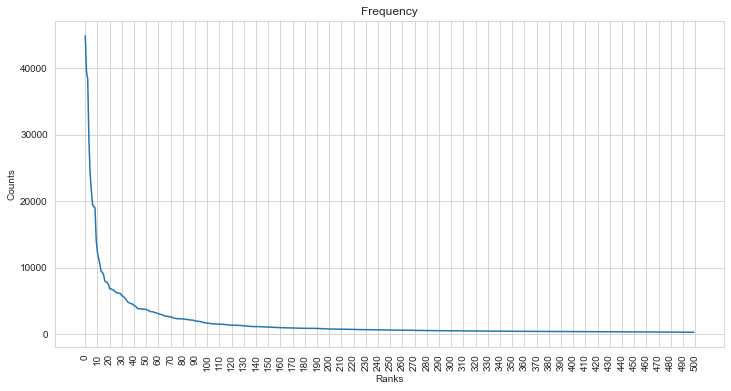

In [21]:
#frequency_train
frequency_train = FreqDist([word for row in final_train for word in row])

print('Total Number of words in training data after raw tokenization: ', sum(frequency_train.values()))
print('Unique words in training data after raw tokenization: ', len(frequency_train))

frequency_plotter(frequency_train)

Total Number of words in testing data after raw tokenization:  126403
Unique words in testing data after raw tokenization:  9782


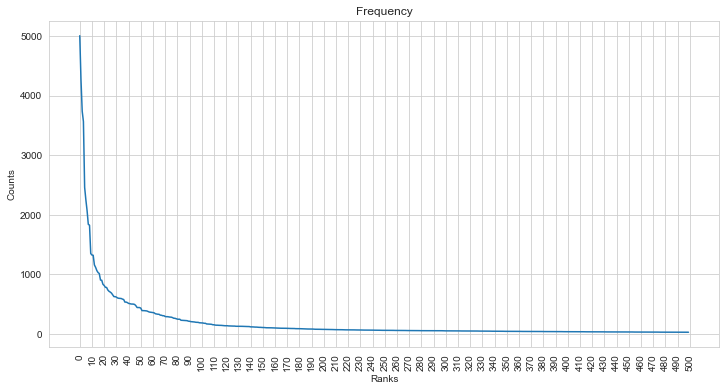

In [22]:
#frequency_test
frequency_test = FreqDist([word for row in final_test for word in row])

print('Total Number of words in testing data after raw tokenization: ', sum(frequency_test.values()))
print('Unique words in testing data after raw tokenization: ', len(frequency_test))

frequency_plotter(frequency_test)

## 3.D Stopwords and Punctuation Removal

In [23]:
stopwords_english = stopwords.words('english')

def data_remove_stopwords_punctuation(tokens, stopwords=stopwords_english, punctuation=string.punctuation):
    return [token for token in tokens if token not in stopwords and token not in punctuation]

In [24]:
final_train = final_train.apply(data_remove_stopwords_punctuation)
final_test = final_test.apply(data_remove_stopwords_punctuation)

Total Number of words in training data after removal of stopwords and punctuation:  647911
Unique words in training data after removal of stopwords and punctuation:  35195


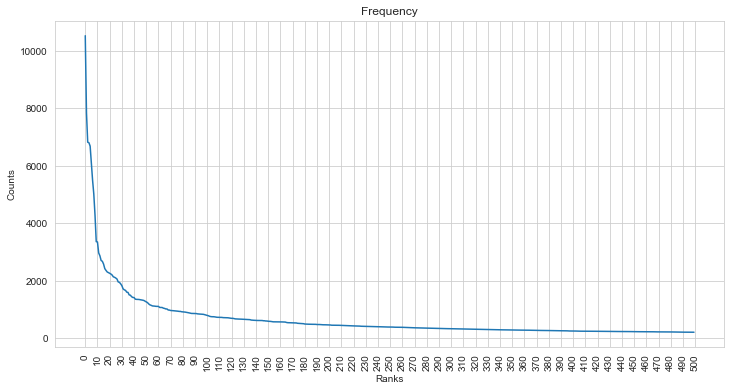

In [25]:
#frequency_train
frequency_train = FreqDist( [word for row in final_train for word in row])

print('Total Number of words in training data after removal of stopwords and punctuation: ', sum(frequency_train.values()))
print('Unique words in training data after removal of stopwords and punctuation: ', len(frequency_train))

frequency_plotter(frequency_train)

Total Number of words in testing data after removal of stopwords and punctuation:  64344
Unique words in testning data after removal of stopwords and punctuation:  9606


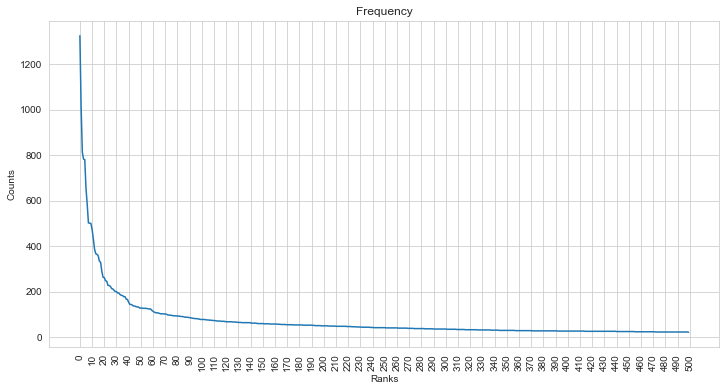

In [26]:
#frequency_test
frequency_test = FreqDist( [word for row in final_test for word in row])

print('Total Number of words in testing data after removal of stopwords and punctuation: ', sum(frequency_test.values()))
print('Unique words in testning data after removal of stopwords and punctuation: ', len(frequency_test))

frequency_plotter(frequency_test)

## 3.E Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def data_stemmer(tokens, stemmer=stemmer):
    return [stemmer.stem(token) for token in tokens]

In [ ]:
final_train = final_train.apply(data_stemmer)
final_test = final_test.apply(data_stemmer)

In [ ]:
#frequency_train

frequency_train = FreqDist( [word for row in final_train for word in row])
print('Total Number of words in training data after stemming: ', sum(frequency_train.values()))
print('Unique words in training data after stemming: ', len(frequency_train))

frequency_plotter(frequency_train)

In [ ]:
#frequency_test

frequency_test = FreqDist( [word for row in final_test for word in row])
print('Total Number of words in testing data after stemming: ', sum(frequency_test.values()))
print('Unique words in testing data after stemming: ', len(frequency_test))

frequency_plotter(frequency_test)

## 3.F Lemmatization

In [27]:
lemmatizer = WordNetLemmatizer() 

def data_lemmatizer(tokens, lemmatizer=lemmatizer):
    return [lemmatizer.lemmatize(token) for token in tokens]

In [28]:
final_train = final_train.apply(data_lemmatizer)
final_test = final_test.apply(data_lemmatizer)

Total Number of words in training data after lemmatizer:  647911
Unique words in training data after lemmatizer:  31595


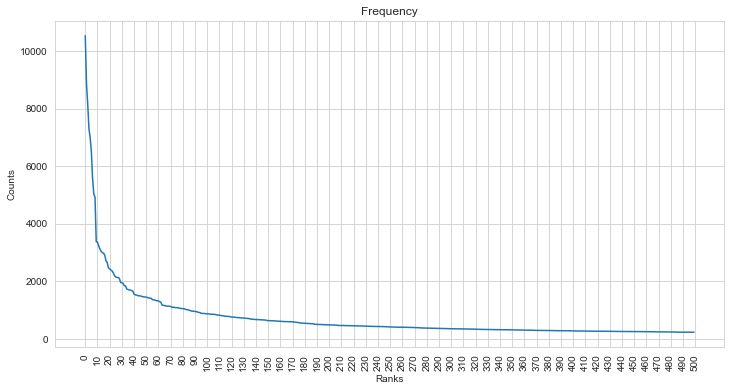

In [29]:
#frequency_train

frequency_train = FreqDist( [word for row in final_train for word in row])
print('Total Number of words in training data after lemmatizer: ', sum(frequency_train.values()))
print('Unique words in training data after lemmatizer: ', len(frequency_train))

frequency_plotter(frequency_train)

Total Number of words in testing data after stemming:  64344
Unique words in testing data after stemming:  8566


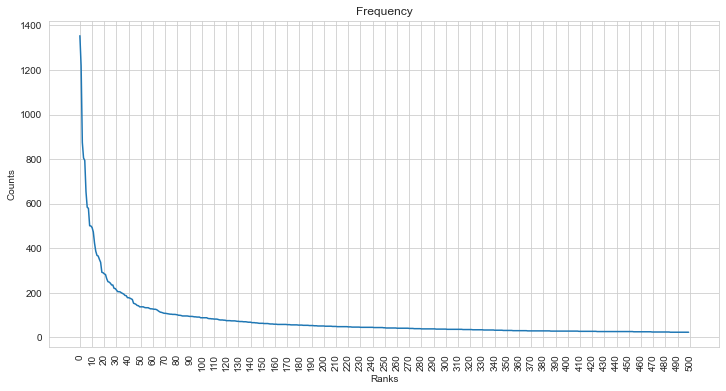

In [30]:
#frequency_test

frequency_test = FreqDist( [word for row in final_test for word in row])
print('Total Number of words in testing data after stemming: ', sum(frequency_test.values()))
print('Unique words in testing data after stemming: ', len(frequency_test))

frequency_plotter(frequency_test)

# Baseline Models

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [32]:
def data_join(tokens):
    return ' '.join(tokens)

In [33]:

count_vectorizer = CountVectorizer(min_df=4, ngram_range=(1,2))
tf_idf_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=4, ngram_range=(1,2))


In [34]:
train_long, test_long = final_train.apply(data_join), final_test.apply(data_join)
train_long
# train_count = count_vectorizer.fit_transform(train_long)
# train_count = train_count.reshape(-1,1)
# test_count = count_vectorizer.transform(test_long)
# test_count = train_count.reshape(-1,1)

0                                                         
1        advice talk neighbour family exchange phone nu...
2        coronavirus australia woolworth give elderly d...
3        food stock one empty ... please panic enough f...
4        ready go supermarket outbreak i'm paranoid foo...
                               ...                        
41152    airline pilot offering stock supermarket shelf...
41153    response complaint provided citing covid relat...
41154    know getting tough rationing toilet paper mart...
41155             wrong smell hand sanitizer starting turn
41156    well new used rift going amazon rn although no...
Name: OriginalTweet, Length: 41157, dtype: object

In [35]:

train_tf_idf = tf_idf_vectorizer.fit_transform(train_long)
#rain_tf_idf_x = train_tf_idf.reshape(-1,1)
test_tf_idf = tf_idf_vectorizer.transform(test_long)
#test_tf_idf = test_tf_idf.reshape(-1,1)


In [36]:
train_tf_idf

<41157x28685 sparse matrix of type '<class 'numpy.float64'>'
	with 784241 stored elements in Compressed Sparse Row format>

## Encoding the polarity

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
train_labels = train_data['Sentiment']
test_labels = test_data['Sentiment']

In [39]:
le = LabelEncoder()
le.fit(train_labels)
print('Label Encoder Classes: ', le.classes_)

train_labels_numpy = np.reshape(train_labels.to_numpy(), (-1, 1))
ohe = OneHotEncoder()
ohe.fit(train_labels_numpy)
print('One Hot Encoder Categories: ', ohe.categories_)

Label Encoder Classes:  ['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']
One Hot Encoder Categories:  [array(['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral',
       'Positive'], dtype=object)]


In [40]:
train_le, test_le = le.transform(train_labels), le.transform(test_labels)
print('Training: ', train_le)
print('Testing : ', test_le)

Training:  [3 4 4 ... 4 3 2]
Testing :  [0 4 1 ... 3 0 1]


In [41]:
train_ohe, test_ohe = ohe.transform(train_labels_numpy), ohe.transform(train_labels_numpy)
print('Training: ', train_ohe)
print('Testing: ', test_ohe)

Training:    (0, 3)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 4)	1.0
  (6, 4)	1.0
  (7, 3)	1.0
  (8, 4)	1.0
  (9, 2)	1.0
  (10, 3)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 4)	1.0
  (14, 4)	1.0
  (15, 4)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 1)	1.0
  (19, 4)	1.0
  (20, 0)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 2)	1.0
  :	:
  (41132, 3)	1.0
  (41133, 0)	1.0
  (41134, 3)	1.0
  (41135, 4)	1.0
  (41136, 3)	1.0
  (41137, 1)	1.0
  (41138, 1)	1.0
  (41139, 4)	1.0
  (41140, 4)	1.0
  (41141, 3)	1.0
  (41142, 1)	1.0
  (41143, 3)	1.0
  (41144, 3)	1.0
  (41145, 4)	1.0
  (41146, 4)	1.0
  (41147, 2)	1.0
  (41148, 1)	1.0
  (41149, 2)	1.0
  (41150, 4)	1.0
  (41151, 1)	1.0
  (41152, 3)	1.0
  (41153, 0)	1.0
  (41154, 4)	1.0
  (41155, 3)	1.0
  (41156, 2)	1.0
Testing:    (0, 3)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 4)	1.0
  (6, 4)	1.0
  (7, 3)	1.0
  (8, 4)	1.0
  (9, 2)	1.0
  (10, 3)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 4)	1.0
  (14, 4)	1.0
  (15, 4

In [42]:
X_train, Y_train, X_test, Y_test= train_tf_idf, train_le, test_tf_idf, test_le

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 1. Naive Bayes

In [44]:
classifier = MultinomialNB(alpha=1e-2).fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print('\n')
print(classification_report(Y_test,y_pred))

[[177   7 303  17  88]
 [ 10 192  79  11 307]
 [121  31 484  60 345]
 [ 28  24 133 242 192]
 [ 38 104 223  55 527]]


              precision    recall  f1-score   support

           0       0.47      0.30      0.37       592
           1       0.54      0.32      0.40       599
           2       0.40      0.46      0.43      1041
           3       0.63      0.39      0.48       619
           4       0.36      0.56      0.44       947

    accuracy                           0.43      3798
   macro avg       0.48      0.41      0.42      3798
weighted avg       0.46      0.43      0.43      3798



## 2. Random Forest

In [45]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print('\n')
print(classification_report(Y_test,y_pred))

[[203   7 259  43  80]
 [ 12 225  41  18 303]
 [ 99  22 487 174 259]
 [  4   4  74 441  96]
 [ 26  70 144 139 568]]


              precision    recall  f1-score   support

           0       0.59      0.34      0.43       592
           1       0.69      0.38      0.49       599
           2       0.48      0.47      0.48      1041
           3       0.54      0.71      0.62       619
           4       0.43      0.60      0.50       947

    accuracy                           0.51      3798
   macro avg       0.55      0.50      0.50      3798
weighted avg       0.53      0.51      0.50      3798



## 3. SVM

In [46]:
classifier = LinearSVC(random_state=0, max_iter=2000).fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print('\n')
print(classification_report(Y_test,y_pred))

[[317   5 215  23  32]
 [  4 364  36   7 188]
 [196  39 443 130 233]
 [ 14  14  95 392 104]
 [ 35 170 162  96 484]]


              precision    recall  f1-score   support

           0       0.56      0.54      0.55       592
           1       0.61      0.61      0.61       599
           2       0.47      0.43      0.44      1041
           3       0.60      0.63      0.62       619
           4       0.46      0.51      0.49       947

    accuracy                           0.53      3798
   macro avg       0.54      0.54      0.54      3798
weighted avg       0.53      0.53      0.53      3798



## 4. Logistic Regression

In [47]:
classifier = LogisticRegression(n_jobs=-1, C=1, random_state=0).fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print('\n')
print(classification_report(Y_test,y_pred))

[[265   8 265  23  31]
 [  6 308  25  14 246]
 [127  26 521 126 241]
 [  5   7 100 394 113]
 [ 29 105 142  86 585]]


              precision    recall  f1-score   support

           0       0.61      0.45      0.52       592
           1       0.68      0.51      0.58       599
           2       0.49      0.50      0.50      1041
           3       0.61      0.64      0.62       619
           4       0.48      0.62      0.54       947

    accuracy                           0.55      3798
   macro avg       0.58      0.54      0.55      3798
weighted avg       0.56      0.55      0.55      3798

